## Preprocessing

In [1]:
import nltk
import requests 
from nltk.corpus import stopwords
import pandas as pd
import random
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

import numpy as np
from sklearn.model_selection import train_test_split

In [38]:
# nltk.download('gutenberg')
# nltk.download('stopwords')
# nltk.download('wordnet')
#!pip install --upgrade mlxtend

**a function that reads the book from gutenberg library and return it's text.**

In [3]:
def read_book(book_name):
    text = nltk.corpus.gutenberg.raw(book_name)
    return text

In [4]:
def read_from_url(url):
  response = requests.get(url)
  text=response.text.split('***')[2]
  return text

**tokinizing the text into a list of words, turning it to lower case and removing stop words.**<br>
*input : the text of the book<br>
output : a list of filtered words*

In [5]:
#tokinizing the words and removing all punctuation marks then changing it to lower case.
def filter_words(text):
    tokenizer = nltk.RegexpTokenizer(r"\w+")
    tokenized_words = tokenizer.tokenize(text)
    tokenized_words = [token.lower() for token in tokenized_words]
    stop_words=set(stopwords.words("english"))
    filtered_words=[]
    
    for w in tokenized_words:
        if w not in stop_words:
            filtered_words.append(w)
    return filtered_words

**Stemming and lemmatizing the text**<br>
*Stemming : coverting words like believing, believed, believes, and believe into believ*<br>
*Lemmatizing : coverting words into it's source, like better -> good*

In [6]:
def stem_words(filtered_words):
  ps = PorterStemmer()
  wl=WordNetLemmatizer()
  stemmed=[]
  for w in filtered_words:
    st=ps.stem(w)
    stemmed.append(wl.lemmatize(st))
  return stemmed


**appending each N words into a partition and labeling them with the book name.**<br>
*input : filtered_words, book_name and number of words*<br>
*output : dataframe of the document as text, tokinized document and label.*

In [7]:
#append each 100 word to a document and label them with the book's name then returns a dataframe
#assumption: i removed the final document to maintain 100 word/document.
def create_docs(filtered_words,book_name,n_words=100):
    labeled_docs=[]
    tokinized_docs=[]
    for i in range(int(len(filtered_words)/n_words)):
        tokinized_docs.append(filtered_words[i*n_words:i*n_words+n_words])
        doc = ' '.join(filtered_words[i*n_words:i*n_words+n_words])
        labeled_docs.append(doc)
    labeled_docs= pd.DataFrame({'Document': labeled_docs,'tokinized_doc':tokinized_docs,'label':book_name})
    return labeled_docs


**taking random samples from the labeled documents.**

In [8]:
# take  a random variable
def take_sample(labeled_docs, sample_size):
    samples=labeled_docs.sample(sample_size)
    return samples

**collecting final steps to the function 'sample_book' that takes the book name and sample size and return the final sampled dataframe.**

In [9]:
def sample_book(book_name,sample_size,url='',word_per_doc=100):
    if url=='':
      path=book_name+'.txt'
      text=read_book(path)
    else:
      text=read_from_url(url)
    filtered_words=filter_words(text)
    stemmed_words=stem_words(filtered_words)
    labeled_docs=create_docs(stemmed_words,book_name,word_per_doc)
    samples=take_sample(labeled_docs,sample_size)
    return samples


## Preparing model input
taking 200 sample from 5 books and appending them into 'samples',<br>
splitiing the data into features and labels, then splitting them into training set and testing set.

In [10]:
books_url=[('Thus_Spake_Zarathustra','https://www.gutenberg.org/files/1998/1998-0.txt'),
           ('The_Brothers_Karamazov','https://www.gutenberg.org/files/28054/28054-0.txt'),
           ('Deep_Waters','https://www.gutenberg.org/files/65445/65445-0.txt'),
           ('Murder_in_the_Gunroom','https://www.gutenberg.org/cache/epub/17866/pg17866.txt'),
           ('Criminal_Psychology','https://www.gutenberg.org/files/1320/1320-0.txt')
           ]
samples=pd.DataFrame()

for book in books_url:
  samples=samples.append(sample_book(book[0],200,book[1]))

samples=samples.reset_index()
samples=samples.drop(columns=['index'])

In [11]:
samples

,Document,tokinized_doc,label
0,hill echo â empti alik hath â sure harvest fru...,"[hill, echo, â, empti, alik, hath, â, sure, ha...",Thus_Spake_Zarathustra
1,bright speaketh honestli thou knowest forsooth...,"[bright, speaketh, honestli, thou, knowest, fo...",Thus_Spake_Zarathustra
2,longer thee free age thou believest divin donk...,"[longer, thee, free, age, thou, believest, div...",Thus_Spake_Zarathustra
3,see also last two vers par 17 par 21 first ten...,"[see, also, last, two, vers, par, 17, par, 21,...",Thus_Spake_Zarathustra
4,yet wentest past never forgiv thee thou goest ...,"[yet, wentest, past, never, forgiv, thee, thou...",Thus_Spake_Zarathustra
...,...,...,...
995,may serv explain origin mani confess save inno...,"[may, serv, explain, origin, mani, confess, sa...",Criminal_Psychology
996,etc may abstract without difficulti much harde...,"[etc, may, abstract, without, difficulti, much...",Criminal_Psychology
997,long case believ fail either lie know express ...,"[long, case, believ, fail, either, lie, know, ...",Criminal_Psychology
998,may depend upon misspel syllabl determin prope...,"[may, depend, upon, misspel, syllabl, determin...",Criminal_Psychology


In [12]:
# Splitting the data into train and  test with ratio 80 : 20 
features= np.array(samples['Document'])
labels=np.array(samples['label'])
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, shuffle=True)
print(X_train.shape)
print(X_test.shape)

(800,)
(200,)


In [26]:
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.decomposition import PCA
from  sklearn import svm
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer
from mlxtend.evaluate import bias_variance_decomp
import matplotlib.pyplot as plt

## Transformations

*Here w'll try defferent Transformations with the same model to decide how the type of transformer participate in the accuracy*<br>
*We'll choose decision tree model because it's a simple one*

### Bag OF Words

In [14]:
# BOW transformation then decisionTree classifier with criterion="entropy"
pipe= Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer(use_idf=False)),
               ('clf', DecisionTreeClassifier(criterion="entropy", max_depth=10)),
              ])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
# print model's accuracy
print('\033[1m{:10s}\033[0m'.format("Accuracy:"),metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.795


### TF-IDF

In [15]:
# TF-IDF transformation then decisionTree classifier with criterion="entropy"
pipe= Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', DecisionTreeClassifier(criterion="entropy", max_depth=10)),
              ])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
# print model's accuracy
print('\033[1m{:10s}\033[0m'.format("Accuracy:"),metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.8


TF-IDF with N-Gram

In [27]:
# TF-IDF transformation then decisionTree classifier with criterion="entropy"
pipe= Pipeline([('tfidf', TfidfVectorizer(analyzer='word', ngram_range=(1,2))),
               ('clf', DecisionTreeClassifier(criterion="entropy", max_depth=10)),
              ])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
# print model's accuracy
print('\033[1m{:10s}\033[0m'.format("Accuracy:"),metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.805


*the accuracy of the model rised slightly when using TF-IDF.*<br>
*it also had higher accuracy with ngram =(1,2) but this is model varient and could change according to each case.*<br>
*we'll use TF-IDF in the next model's because it acheived best performance.*

## Classification and evaluation

### TF-IDF with decision Tree




In [16]:
# TFIDF transformation then decisionTree classifier with criterion="entropy"

pipe_DT= Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', DecisionTreeClassifier(criterion="entropy", max_depth=10)),
              ])
pipe_DT.fit(X_train, y_train)
y_pred_DT = pipe_DT.predict(X_test)

#Evaluation
print('\033[1m{:10s}\033[0m'.format('decision_tree_entropoy_model'))
print("Report : ",classification_report(y_test, y_pred_DT))
print('\033[1m{:10s}\033[0m'.format("Accuracy:"),metrics.accuracy_score(y_test, y_pred_DT))

scores = cross_val_score(pipe_DT, X_train, y_train, scoring='accuracy', cv=10)
print("cross-val scores: ",scores)
print('\033[1m{:10s}\033[0m'.format("cross-val scores' mean: "),np.mean(scores))

decision_tree_entropoy_model
Report :                          precision    recall  f1-score   support

   Criminal_Psychology       0.54      0.98      0.70        41
           Deep_Waters       0.95      0.83      0.88        46
 Murder_in_the_Gunroom       1.00      0.95      0.97        37
The_Brothers_Karamazov       0.96      0.65      0.77        37
Thus_Spake_Zarathustra       1.00      0.67      0.80        39

              accuracy                           0.81       200
             macro avg       0.89      0.81      0.83       200
          weighted avg       0.89      0.81      0.82       200

Accuracy:  0.815
cross-val scores:  [0.7625 0.7625 0.7875 0.7625 0.8625 0.825  0.7875 0.825  0.7375 0.75  ]
cross-val scores' mean:  0.78625


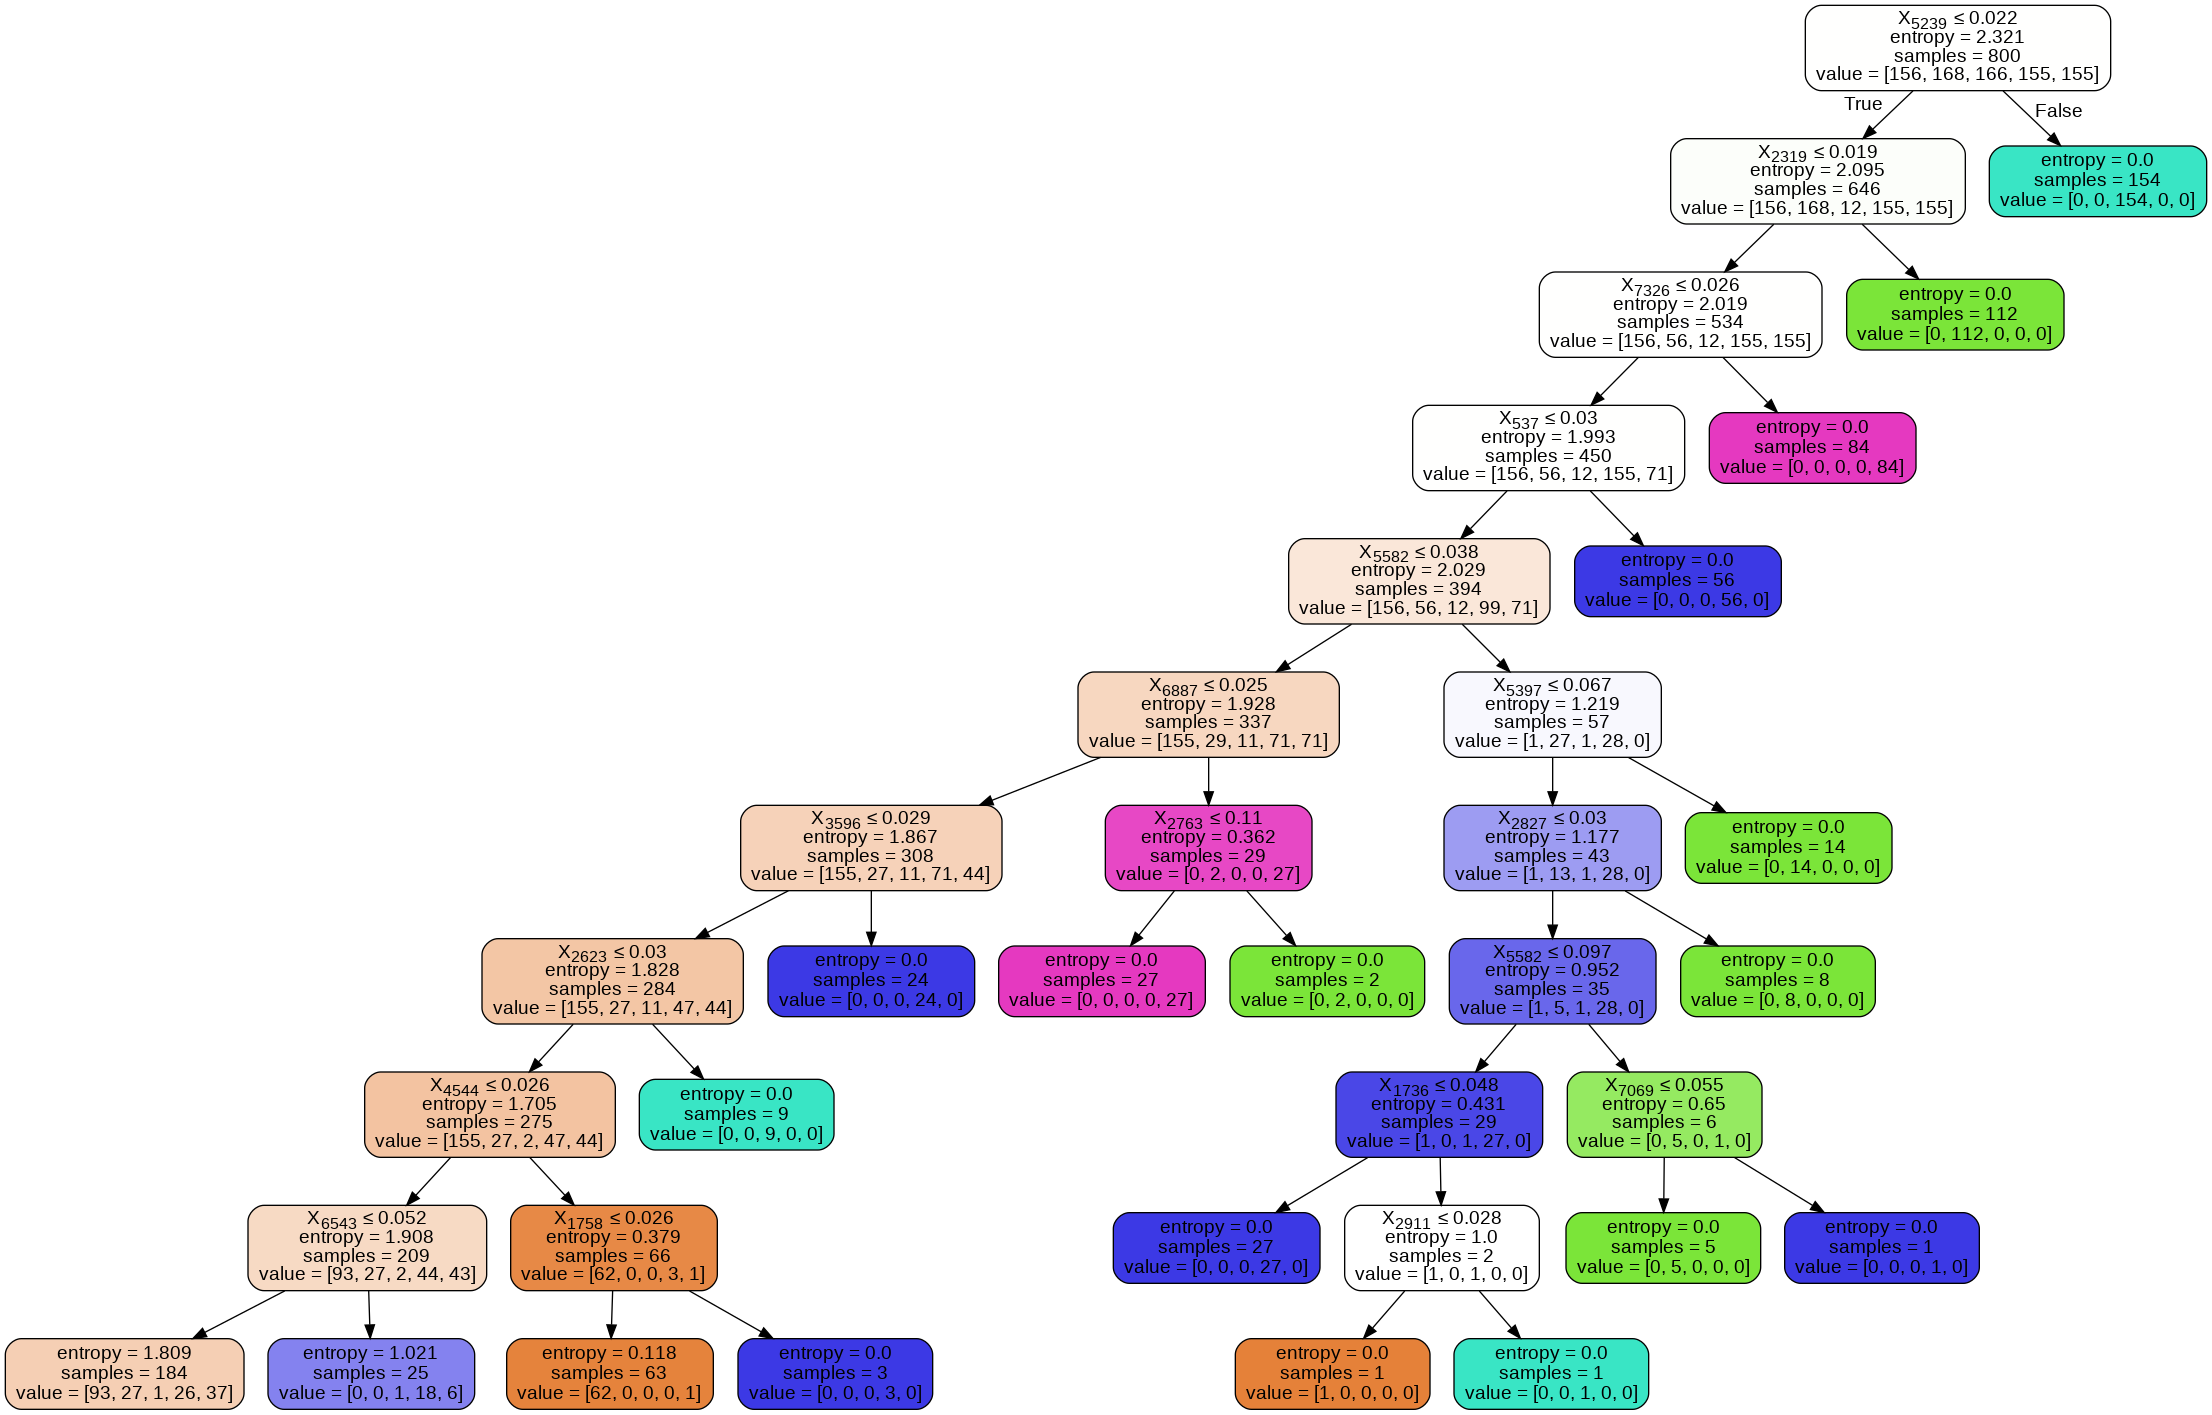

In [69]:
## decision tree visualization
dot_data = StringIO()
export_graphviz(pipe_DT['clf'], out_file=dot_data, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Decision Tree.png')
Image(graph.create_png())

In [29]:
y_train_lookupTable, y_train_as_ints = np.unique(y_train, return_inverse=True)
y_test_lookupTable, y_test_as_ints = np.unique(y_test, return_inverse=True)

avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
    pipe_DT, X_train, y_train_as_ints, X_test, y_test_as_ints,
    num_rounds=10,
    loss='0-1_loss')


print('Average expected loss: %.3f' % avg_expected_loss)
print('Average bias: %.3f' % avg_bias)
print('Average variance: %.3f' % avg_var)

Average expected loss: 0.248
Average bias: 0.220
Average variance: 0.138


*the accuracy for the decision tree wasn't so good it also had high bias and high variance*

### TF-IDF with KNN

In [30]:
# TF-IDF transformation then KNN classifier

pipe_knn= Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf',KNeighborsClassifier(n_neighbors=3)),
              ])
pipe_knn.fit(X_train, y_train)
y_pred_knn = pipe_knn.predict(X_test)

#Evaluation
print('\033[1m{:10s}\033[0m'.format('TF-IDF_KNN_model'))
print("Report : ",classification_report(y_test, y_pred_knn))
print('\033[1m{:10s}\033[0m'.format("Accuracy:"),metrics.accuracy_score(y_test, y_pred_knn))

scores = cross_val_score(pipe_knn, X_train, y_train, scoring='accuracy', cv=10)
print("cross-val scores: ",scores)
print('\033[1m{:10s}\033[0m'.format("cross-val scores' mean: "),np.mean(scores))

TF-IDF_KNN_model
Report :                          precision    recall  f1-score   support

   Criminal_Psychology       0.92      0.88      0.90        41
           Deep_Waters       0.94      1.00      0.97        46
 Murder_in_the_Gunroom       1.00      0.97      0.99        37
The_Brothers_Karamazov       0.91      0.84      0.87        37
Thus_Spake_Zarathustra       0.93      1.00      0.96        39

              accuracy                           0.94       200
             macro avg       0.94      0.94      0.94       200
          weighted avg       0.94      0.94      0.94       200

Accuracy:  0.94
cross-val scores:  [0.9375 0.95   0.9625 1.     0.9625 0.95   0.9125 0.95   0.9125 0.9625]
cross-val scores' mean:  0.95


In [34]:
avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
    pipe_knn, X_train, y_train_as_ints, X_test, y_test_as_ints,
    num_rounds=10,
    loss='0-1_loss')


print('Average expected loss: %.3f' % avg_expected_loss)
print('Average bias: %.3f' % avg_bias)
print('Average variance: %.3f' % avg_var)

Average expected loss: 0.080
Average bias: 0.050
Average variance: 0.058


the model's accuracy is significantly better than the decision tree also both bias and variance decreased.

### TF-IDF with SVM

In [19]:
# TF-IDF transformation then SVM classifier

pipe_SVM= Pipeline([('tfidf', TfidfVectorizer()),
               ('clf',svm.SVC(kernel='linear', C=1)),
              ])
pipe_SVM.fit(X_train, y_train)
y_pred_SVM= pipe_SVM.predict(X_test)

#Evaluation
print('\033[1m{:10s}\033[0m'.format('TF-IDF_SVM_model'))
print("Report : ",classification_report(y_test, y_pred_SVM))
print('\033[1m{:10s}\033[0m'.format("Accuracy:"),metrics.accuracy_score(y_test, y_pred_SVM))

scores = cross_val_score(pipe_SVM, X_train, y_train, scoring='accuracy', cv=10)
print("cross-val scores: ",scores)
print('\033[1m{:10s}\033[0m'.format("cross-val scores' mean: "),np.mean(scores))

TF-IDF_SVM_model
Report :                          precision    recall  f1-score   support

   Criminal_Psychology       0.98      1.00      0.99        41
           Deep_Waters       1.00      1.00      1.00        46
 Murder_in_the_Gunroom       1.00      1.00      1.00        37
The_Brothers_Karamazov       1.00      0.97      0.99        37
Thus_Spake_Zarathustra       1.00      1.00      1.00        39

              accuracy                           0.99       200
             macro avg       1.00      0.99      0.99       200
          weighted avg       1.00      0.99      0.99       200

Accuracy:  0.995
cross-val scores:  [0.9625 0.9625 1.     1.     1.     1.     0.975  0.975  1.     1.    ]
cross-val scores' mean:  0.9875


In [37]:
avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
    pipe_SVM, X_train, y_train_as_ints, X_test, y_test_as_ints,
    num_rounds=10,
    loss='0-1_loss')


print('Average expected loss: %.3f' % avg_expected_loss)
print('Average bias: %.3f' % avg_bias)
print('Average variance: %.3f' % avg_var)

Average expected loss: 0.008
Average bias: 0.005
Average variance: 0.004


*the model accuracy is the better than both knn and decision tree, also the bias and variance decreased significantly.*<br>

### TF-IDF with Logistic Regression

In [47]:
# TFIDF transformation then LogisticRegressionCV classifier

pipe_LR= Pipeline([('tfidf', TfidfVectorizer()),
                   ('clf', LogisticRegressionCV(max_iter = 200)),
                   ])
pipe_LR.fit(X_train, y_train)
y_pred_LR = pipe_LR.predict(X_test)

#Evaluation
print('\033[1m{:10s}\033[0m'.format('LogisticRegressionCV_model'))
print("Report : ",classification_report(y_test, y_pred_LR))
print('\033[1m{:10s}\033[0m'.format("Accuracy:"),metrics.accuracy_score(y_test, y_pred_LR))

scores = cross_val_score(pipe_LR, X_train, y_train, scoring='accuracy', cv=10)
print("cross-val scores: ",scores)
print('\033[1m{:10s}\033[0m'.format("cross-val scores' mean: "),np.mean(scores))

LogisticRegressionCV_model
Report :                          precision    recall  f1-score   support

   Criminal_Psychology       0.98      1.00      0.99        41
           Deep_Waters       1.00      1.00      1.00        46
 Murder_in_the_Gunroom       1.00      1.00      1.00        37
The_Brothers_Karamazov       1.00      0.97      0.99        37
Thus_Spake_Zarathustra       1.00      1.00      1.00        39

              accuracy                           0.99       200
             macro avg       1.00      0.99      0.99       200
          weighted avg       1.00      0.99      0.99       200

Accuracy:  0.995
cross-val scores:  [0.975  0.9625 1.     1.     1.     0.9875 0.9625 0.9875 1.     1.    ]
cross-val scores' mean:  0.9875


In [25]:
y_train_lookupTable, y_train_as_ints = np.unique(y_train, return_inverse=True)
y_test_lookupTable, y_test_as_ints = np.unique(y_test, return_inverse=True)

avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
    pipe_LR, X_train, y_train_as_ints, X_test, y_test_as_ints,
    num_rounds=10,
    loss='0-1_loss')


print('Average expected loss: %.3f' % avg_expected_loss)
print('Average bias: %.3f' % avg_bias)
print('Average variance: %.3f' % avg_var)

Average expected loss: 0.011
Average bias: 0.010
Average variance: 0.006


*the logistic regression model's output is very similar to that of the SVM's*<br>

## Error Analysis

In [44]:
# !pip install eli5
# !pip install lime

In [48]:
import eli5
clf=pipe_LR['clf']
vec=pipe_LR['tfidf']
true_labels = ['Criminal_Psychology','Deep_Waters','Murder_in_the_Gunroom','The_Brothers_Karamazov','Thus_Spake_Zarathustra']

eli5.show_weights(clf, vec=vec, top=10)

*here we have the words with highest contribution for each class.*

In [49]:
error_df=pd.DataFrame({'X':X_test,'y':y_test,'y_pred':y_pred_LR})
error_df=error_df.query('y != y_pred')
error_df

,X,y,y_pred
125,fail make mark outset career never made later ...,The_Brothers_Karamazov,Criminal_Psychology


*we have only one record that is wrongly predicted which belonged to the book The_Brothers_Karamazov but was predicted as criminal psycology*

In [52]:
eli5.show_prediction(clf, X_test[error_df.index[0]], vec=vec, targets=['The_Brothers_Karamazov','Criminal_Psychology'])

*here we have the words' weights that participated in the model's decision.*<br>
*we have words like 'case', 'phenomenon' and 'judg' which throw the model off and confused it to choose criminal psycology.*

In [68]:
from lime import lime_text
from lime.lime_text import LimeTextExplainer

explainer = LimeTextExplainer(class_names=true_labels)
exp = explainer.explain_instance(X_test[error_df.index[0]], pipe_LR.predict_proba, num_features=6, top_labels=3)

exp.show_in_notebook()

*here we have another visualization for the wrongly predicted record which highlights the words that made the modelweighted different classes.*

## Chunk Size

In [62]:
chunk_size=[1,2,5,10,20,50,80,100]
accuracies=[]
for cs in chunk_size:

  samples_small=pd.DataFrame()
  for book in books_url:
    samples_small=samples_small.append(sample_book(book[0],200,book[1],cs))

  samples_small=samples_small.reset_index()
  samples_small=samples_small.drop(columns=['index'])
  features= np.array(samples_small['Document'])
  labels=np.array(samples_small['label'])
  X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, shuffle=True)
  y_pred_small = pipe_LR.predict(X_test)
  accuracies.append(metrics.accuracy_score(y_test, y_pred_small))
accuracies

[0.38, 0.465, 0.65, 0.81, 0.9, 0.98, 0.995, 0.985]

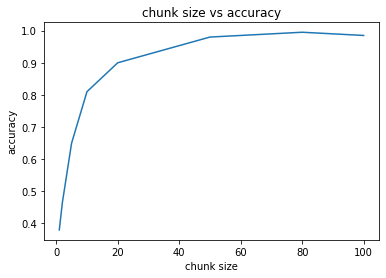

In [63]:
plt.plot(chunk_size,accuracies)
plt.title("chunk size vs accuracy")
plt.xlabel("chunk size")
plt.ylabel("accuracy");

*as the chunk size decrease the accuracy of the model decrease because the model can't catch the relation between different words in each chunk but after 40 word per chunk it saturates.*

## number of samples taken from each book

In [65]:
n_samples=[10,20,50,80,110,140,170,200]
accuracies=[]
for N in n_samples:

  samples_small=pd.DataFrame()
  for book in books_url:
    samples_small=samples_small.append(sample_book(book[0],N,book[1],100))

  samples_small=samples_small.reset_index()
  samples_small=samples_small.drop(columns=['index'])
  features= np.array(samples_small['Document'])
  labels=np.array(samples_small['label'])
  X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, shuffle=True)
  y_pred_small = pipe_LR.predict(X_test)
  accuracies.append(metrics.accuracy_score(y_test, y_pred_small))
accuracies

[1.0, 1.0, 0.98, 1.0, 0.990909090909091, 0.9928571428571429, 1.0, 0.99]

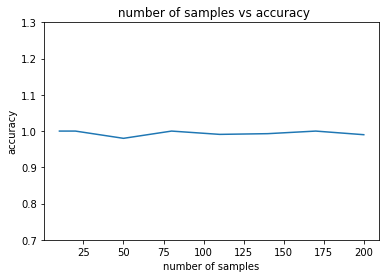

In [66]:
plt.plot(n_samples,accuracies)
plt.title(" number of samples vs accuracy")
plt.xlabel("number of samples")
plt.ylabel("accuracy")
plt.ylim(0.7, 1.3);

*number of samples from each book doesn't affect the accuracy*